In [78]:
import sys
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from segmentacion.globalT import thresholdingGlobal
from bordes import minimum_circular_shift
from formas_binarias import first_difference
from collections import Counter
from bordes import trace_boundary
import numpy as np
from morfologia import dilatacion
from morfologia import erosion
from sklearn.neighbors import KNeighborsClassifier
from general import rotar
from general import escala

def loadDataset(fileName, samples):
    x = []
    y = []
    train_data = pd.read_csv(fileName)
    y = np.array(train_data.iloc[0:samples, 0])
    x = np.array(train_data.iloc[0:samples, 1:])
    return x,y

(100, 784)
(100,)
1


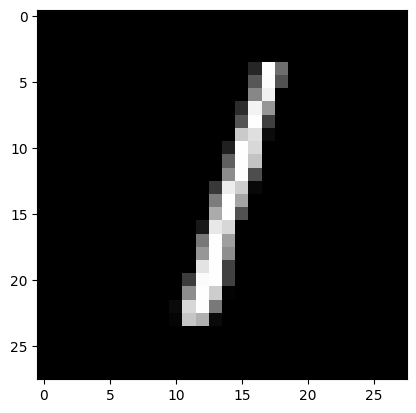

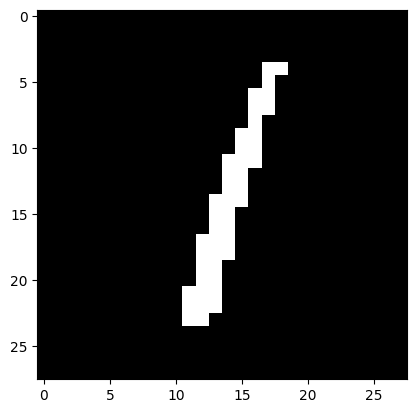

In [46]:
x,y=loadDataset("Nmist/mnist_test.csv",100)
indice = 1

print(x.shape)
print(y.shape)
print(y[indice])
digit = x[indice]

digit_pixels = digit.reshape(28, 28)
plt.imshow(digit_pixels, cmap='gray')
plt.show()

binary  = thresholdingGlobal(digit_pixels,45)
binary = erosion(dilatacion(binary,kernel),kernel)

plt.imshow(binary, cmap='gray')
plt.show()

In [73]:
def freeman (cadena):
    cadena,coordenadas  =  trace_boundary(binary)
    normal = minimum_circular_shift(cadena)
    #print(normal)
    transform =  first_difference(normal,8)
    return transform
 
def conteo (cadena):
    conteo = {num: cadena.count(num) for num in range(10)}
    resultado = [conteo.get(num, 0) for num in range(10)]
    resultado.append(len(cadena))
    #print(resultado)
    return resultado

kernel = np.ones((3, 3))

In [74]:
x,y=loadDataset("Nmist/mnist_test_copy.csv",1000)

longitudes = []
resultados_transform = [] 
for indice in range(1000):
    digit = x[indice]
    digit_pixels = digit.reshape(28, 28)
    binary  = thresholdingGlobal(digit_pixels,10)
    binary = erosion(dilatacion(binary,kernel),kernel)
    transform = freeman(binary)
    resultados_transform.append(conteo(transform))
    #resultados_transform.append(len(transform))
    #print(resultados_transform)
    #print(transform)
    longitudes.append(len(transform))
dataset = np.column_stack((resultados_transform, y))
df = pd.DataFrame(dataset, columns= [f'Repeticiones_{i}' for i in range(10)] +['Tamaño']+ ['Label'])
df.to_csv('freeman.csv', index=False)
df


print(max(longitudes))
print(min(longitudes))


102
26


In [65]:
from sklearn.model_selection import train_test_split

X = df.drop('Label', axis=1)
y = df['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10)  # Puedes ajustar el valor de k

# Entrenar el modelo con los datos de entrenamiento
knn.fit(X_train, y_train)
# Predecir etiquetas en el conjunto de prueba
y_pred = knn.predict(X_test)

# Evaluar el rendimiento del modelo (por ejemplo, utilizando la precisión)
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Precisión del modelo: {accuracy}')
print(report)

Precisión del modelo: 0.42333333333333334
              precision    recall  f1-score   support

           0       0.48      0.66      0.55        32
           1       0.95      0.95      0.95        39
           2       0.30      0.47      0.36        30
           3       0.24      0.28      0.26        32
           4       0.47      0.47      0.47        36
           5       0.33      0.14      0.19        22
           6       0.23      0.24      0.24        25
           7       0.40      0.17      0.24        35
           8       0.22      0.17      0.20        23
           9       0.34      0.38      0.36        26

    accuracy                           0.42       300
   macro avg       0.40      0.39      0.38       300
weighted avg       0.42      0.42      0.41       300



In [67]:
from Clasificadores import knn
knn(df,5)

Precisión del modelo: 0.4
              precision    recall  f1-score   support

           0       0.50      0.71      0.59        24
           1       0.96      0.93      0.94        27
           2       0.23      0.30      0.26        20
           3       0.33      0.26      0.29        23
           4       0.35      0.45      0.39        20
           5       0.14      0.08      0.10        13
           6       0.20      0.22      0.21        18
           7       0.33      0.17      0.22        24
           8       0.21      0.19      0.20        16
           9       0.29      0.33      0.31        15

    accuracy                           0.40       200
   macro avg       0.36      0.36      0.35       200
weighted avg       0.39      0.40      0.39       200



In [69]:
from Clasificadores import svm_lineal

svm_lineal(df)

Classifying...
Classification done!
----------------------------------------------------------------------
SUMARY: Summary
----------------------------------------------------------------------
CLASSIF		MEAN	MEDIAN	MINV	MAXV	STD
----------------------------------------------------------------------
SVM_linear      39.24	39.0	30.0	47.5	3.6
----------------------------------------------------------------------



In [70]:
from Clasificadores import svm_radial

svm_radial(df)

Classifying...
Classification done!
----------------------------------------------------------------------
SUMARY: Summary
----------------------------------------------------------------------
CLASSIF		MEAN	MEDIAN	MINV	MAXV	STD
----------------------------------------------------------------------
SVM_radial      40.79	40.5	32.5	49.5	3.21
----------------------------------------------------------------------



5
[0, 0, 0, 1, 7, 0, 1, 7, 1, 7, 0, 1, 7, 6, 6, 1, 7, 0, 1, 7, 1, 7, 1, 7, 0, 0, 1, 0, 1, 0, 1, 1, 7, 7, 0, 0, 7, 1, 0, 7, 0, 5, 0, 7, 0, 1, 0, 0, 0, 1, 1, 0, 6, 1, 6, 0, 1, 0, 6]
[0, 0, 0, 1, 7, 0, 1, 7, 1, 7, 0, 1, 7, 6, 6, 1, 7, 0, 1, 7, 1, 7, 1, 7, 0, 0, 1, 0, 1, 0, 1, 1, 7, 7, 0, 0, 7, 1, 0, 7, 0, 5, 0, 7, 0, 1, 0, 0, 0, 1, 1, 0, 6, 1, 6, 0, 1, 0, 6]
[0, 0, 0, 1, 7, 0, 1, 7, 1, 7, 0, 1, 7, 6, 6, 1, 7, 0, 1, 7, 1, 7, 1, 7, 0, 0, 1, 0, 1, 0, 1, 1, 7, 7, 0, 0, 7, 1, 0, 7, 0, 5, 0, 7, 0, 1, 0, 0, 0, 1, 1, 0, 6, 1, 6, 0, 1, 0, 6]


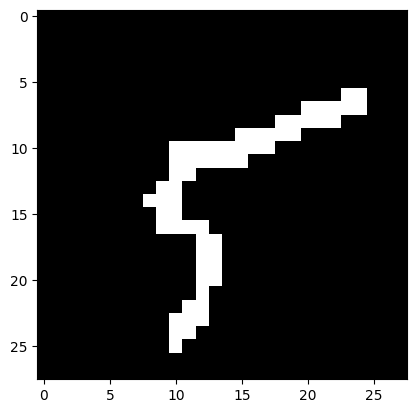

In [80]:
angulo_rotacion = 268
x,y=loadDataset("Nmist/mnist_test.csv",100)
indice = 58

print(y[indice])
digit = x[indice]

digit_pixels = digit.reshape(28, 28)
digit_pixels = digit_pixels.astype(np.uint8)

binary  = thresholdingGlobal(digit_pixels,10)
binary = erosion(dilatacion(binary,kernel),kernel)
binary2 = escala(binary,2)
normal = freeman(binary)
print(normal)

img = rotar(binary, angulo_rotacion)
rotada = freeman(img)
print(rotada)


binary2 = erosion(dilatacion(binary2,kernel),kernel)
normal2 = freeman(binary2)
print(normal2)



plt.imshow(binary, cmap='gray')
plt.show()